In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from scipy import stats
from scipy.special import beta as beta_function

In [2]:
n_samples = 10000
# p = np.random.random(n_samples)
p_axis = np.linspace(0, 1, n_samples)
prob_prior= np.repeat(1, n_samples)
prob_data = stats.binom.pmf(6, 9, p_axis)
posterior = prob_data * prob_prior
posterior /= np.sum(posterior)

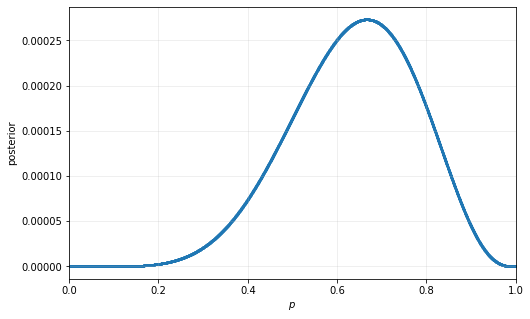

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

xmin, xmax = 0, 1
ax.scatter(p_axis, posterior, s=1)# color='dodgerblue', alpha=.7, histtype='stepfilled', ec='k')
ymin, ymax = ax.axis()[-2:]
ax.set(xlabel='$p$', ylabel='posterior', xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0);

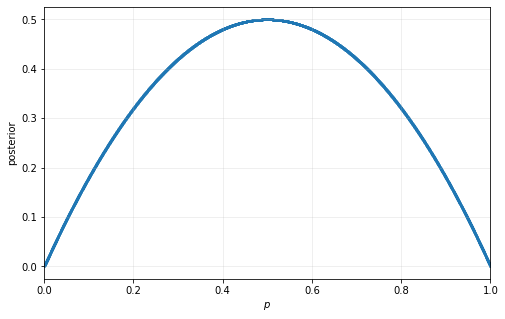

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

xmin, xmax = 0, 1
ax.scatter(p_axis, np.linspace(1, 0, 10000)*2 * np.linspace(0, 1, 10000), s=1)# color='dodgerblue', alpha=.7, histtype='stepfilled', ec='k')
ymin, ymax = ax.axis()[-2:]
ax.set(xlabel='$p$', ylabel='posterior', xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0);

In [7]:
def likelihood(W, L, p):
    return np.math.factorial(W+L) / (np.math.factorial(W) * np.math.factorial(L)) * p**W * (1-p)**L

def likelihood_water(W, N, p):
    return np.math.factorial(N) / (np.math.factorial(W) * np.math.factorial(N-W)) * p**W * (1-p)**(N-W)

def posterior_water(W, N, p):
    post_propto = prob_prior * likelihood_water(W=W, N=N, p=p)
    normalization = np.math.factorial(N) / (np.math.factorial(W) * np.math.factorial(N-W)) * beta_function(W+1, N-W+1)
    posterior = post_propto / normalization
    return posterior

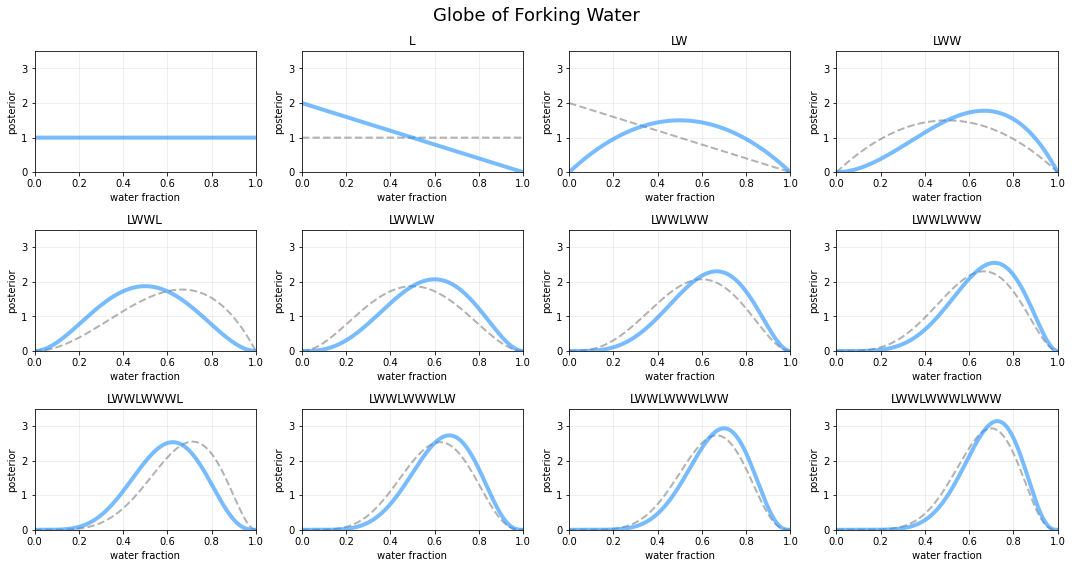

In [19]:
fig, axs = plt.subplots(figsize=(15, 8), ncols=4, nrows=3)
plt.suptitle('Globe of Forking Water', fontsize=18)
seq = ['L', 'W', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'W']
xmin, xmax = 0, 1
ymin, ymax = 0, 3.5
cnt_all, cnt_water = 0, 0
sequence = ''
for idx, ax in enumerate(axs.flat):
    if idx != 0:
        sample = seq[idx-1]
        if sample == 'W':
            cnt_water += 1
        cnt_all += 1
        sequence += sample
        ax.plot(p_axis, last_posterior, c='gray', ls='--', lw=2, alpha=0.6)
    last_posterior = posterior_water(W=cnt_water, N=cnt_all, p=p_axis)
    ax.plot(p_axis, last_posterior, c='dodgerblue', lw=4, alpha=0.6)
    ax.set(xlabel='water fraction', ylabel='posterior', title=f'{sequence}', 
           xlim=[xmin,xmax], ylim=[ymin,ymax])
    ax.grid(lw=1, alpha=0.2, zorder=0)
plt.tight_layout()
# fig.savefig('plots/Globe-Forking-Water.pdf', bbox_inches='tight')

In [25]:
np.unique(seq, return_counts=True)

(array(['L', 'W'], dtype='<U1'), array([3, 8], dtype=int64))